<a href="https://colab.research.google.com/github/Alenushka2013/datasharing/blob/master/Genesis_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/breed_ads.csv')

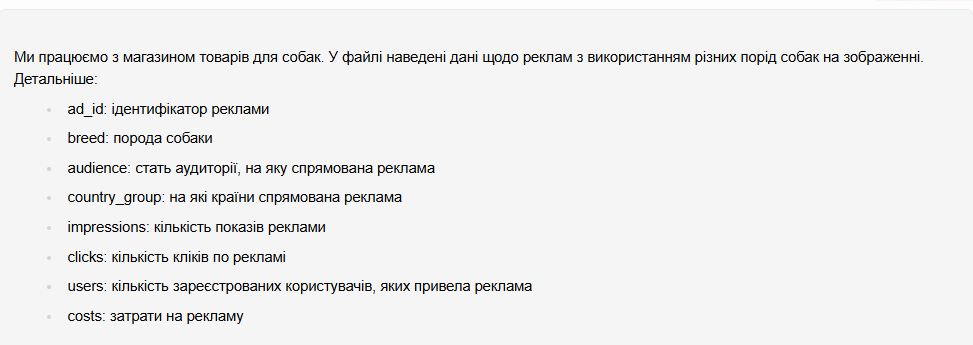

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ad_id          550 non-null    object 
 1   breed          550 non-null    object 
 2   audience       549 non-null    object 
 3   country_group  550 non-null    object 
 4   clicks         550 non-null    int64  
 5   impressions    550 non-null    int64  
 6   users          550 non-null    int64  
 7   costs          549 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 34.5+ KB


In [4]:
df.head()

,ad_id,breed,audience,country_group,clicks,impressions,users,costs
0,SFz8962b5gF9Z9WrglXpkSkLcZ0gVWsPGR0raDDGmPU=,breed_2,Male,Other,6181,108446,254,7381.01
1,XBY7gLyoZYUHnwrcb7CQXsXaQrL1VAaXxAR0C9ABqC0=,breed_1,Male,Tier1,1035,128367,151,5686.12
2,/krLoIPXKGCFXxCp6ENaU/3enKHu7toWnaK/PwylhvM=,breed_2,Male,Tier1,440417,69284146,2448,73456.71
3,OzzzUfAzWDs1OE6nCWYWaKxhMTB8TONA1jebmpvIvrI=,breed_1,Male,Other,38875,2902476,78,1137.61
4,vCYMDAhCERWSKiDte8Cq2DB7rlYb6NTKGUS662RiT30=,breed_2,Male,Tier1,108755,3174165,651,10204.15


In [5]:
# 1
df.users.sum()

np.int64(136023)

In [6]:
# 2
df.groupby('country_group').clicks.sum()

,clicks
country_group,
Other,85730061
Tier1,15596798


In [7]:
df.describe()

,clicks,impressions,users,costs
count,5.500000e+02,5.500000e+02,550.000000,549.000000
mean,1.842307e+05,1.959592e+07,247.314545,4031.341894
std,1.696878e+06,1.926254e+08,865.514582,10815.615086
min,1.500000e+01,3.630000e+02,10.000000,47.790000
25%,7.787500e+02,3.295175e+04,18.000000,394.140000
50%,3.747500e+03,1.517625e+05,36.000000,784.680000
75%,1.699900e+04,6.607190e+05,114.000000,2400.810000
max,3.216684e+07,2.994684e+09,8956.000000,136906.300000


In [8]:
# 3
breed_1_df = df[df['breed'] == 'breed_1']
total_clicks = breed_1_df['clicks'].sum()
total_impressions = breed_1_df['impressions'].sum()

ctr = (total_clicks / total_impressions) * 100
print(f"CTR для breed_1: {ctr:.2f}%")

CTR для breed_1: 0.92%


In [9]:
# 4

df_women = df[df['audience'] == 'Female']
df_men = df[df['audience'] == 'Male']

costs_women = df_women['costs'].sum()
impressions_women = df_women['impressions'].sum()

costs_men = df_men['costs'].sum()
impressions_men = df_men['impressions'].sum()

cpm_women = (costs_women / impressions_women) * 1000
cpm_men = (costs_men / impressions_men) * 1000

print(f"Реклама для жінок дорожча у {cpm_women / cpm_men:.2f} раз(и)")

Реклама для жінок дорожча у 26.29 раз(и)


In [10]:
# 5

breed_grouped = df.groupby('breed').agg({'users': 'sum', 'costs': 'sum'})
breed_grouped['efficiency'] = breed_grouped['users'] / breed_grouped['costs']
top_breeds = breed_grouped.sort_values('efficiency', ascending=False).head(5)
print(top_breeds[['efficiency']])

         efficiency
breed              
breed_3    0.067990
breed_1    0.063846
breed_2    0.047323
other      0.036609
Mix        0.035239


In [11]:
# 6
df_grouped = df.groupby(['breed', 'audience', 'country_group']).agg({'users': 'sum', 'costs': 'sum'})
df_grouped['efficiency'] = df_grouped['costs']/df_grouped['users']
df_grouped.sort_values('efficiency').head(1)

,,,users,costs,efficiency
breed,audience,country_group,,,
breed_1,Male,Other,28049,132859.55,4.736695


In [12]:
# 7
df_grouped = df.groupby(['breed', 'audience']).agg({'clicks': 'sum', 'impressions': 'sum'})
df_grouped['CTR'] = df_grouped['clicks'] / df_grouped['impressions'] * 100
df_grouped

clicks  impressions       CTR
breed   audience                                 
Mix     Both        166048      6649859  2.497015
        Female       24211      1111097  2.179018
        Male         33052       742768  4.449842
breed_1 Both         10312       800131  1.288789
        Female      801714     36457695  2.199025
        Male      75707448   8260334841  0.916518
breed_2 Female       46776      1912206  2.446180
        Male       6174148    224470513  2.750539
breed_3 Female       11316       538963  2.099588
        Male      18331012   2244014683  0.816885
other   Female        6450       290188  2.222697

In [13]:
# 8
df_Tier1 = df[df.country_group == 'Tier1']
df_Tier1_grouped = df_Tier1.groupby('breed').agg({'clicks': 'sum', 'impressions': 'sum'})
df_Tier1_grouped['CTR'] = df_Tier1_grouped['clicks'] / df_Tier1_grouped['impressions'] * 100
df_Tier1_grouped.sort_values('CTR').tail(1)

,clicks,impressions,CTR
breed,,,
other,20822,723214,2.879092


In [14]:
df = df[df['impressions'] > 0]
df['CTR'] = df['clicks'] / df['impressions'] * 100

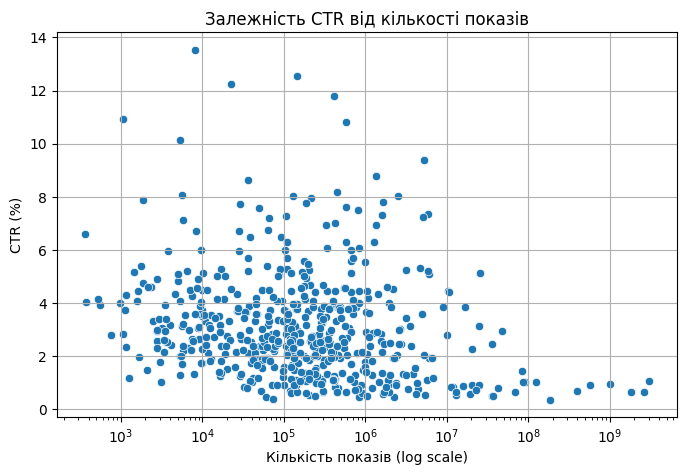

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x='impressions', y='CTR', data=df)
plt.xscale('log')  # якщо дані мають великий розкид
plt.xlabel('Кількість показів (log scale)')
plt.ylabel('CTR (%)')
plt.title('Залежність CTR від кількості показів')
plt.grid(True)
plt.show()

In [16]:
corr = df[['impressions', 'CTR']].corr().iloc[0, 1]
print(f'Кореляція між impressions і CTR: {corr:.3f}')

Кореляція між impressions і CTR: -0.108
